In [2]:
import numpy as np
from qiskit.algorithms.optimizers.cmaes import TellObject
from qiskit.algorithms.optimizers import SteppableCMAES

np.random.seed(12)

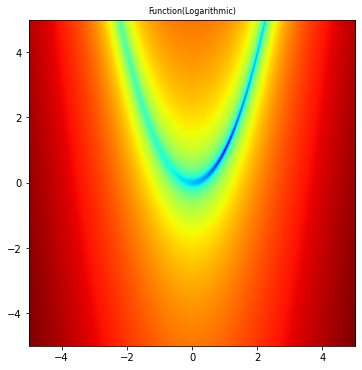

In [4]:
import matplotlib.pyplot as plt
from pylab import figure, cm
from matplotlib.patches import Ellipse
def banana_function(x,y):
    return (x-1)**2 + 100*(y-x**2)**2

def objective(x):
    return banana_function(x[0],x[1])





x1_min = -5
x1_max = 5
x2_min = -5
x2_max = 5

x1, x2 = np.meshgrid(np.linspace(x1_min,x1_max,500), np.linspace(x2_min,x2_max, 500))

y = banana_function(x1,x2)

fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(np.log10(y),extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')

ax.set_title("Function(Logarithmic)" , fontsize=8)

plt.show()

In [30]:
ellipses = []
def callback(state):
        # print(  f"(Generation:{state.nit} ; sigma:{state.sigma:.4E} ; objective:{state.fun(state.x):.4E} ; nfev:{state.nfev}")
        # print(f"x={state.x}")
        # print(f"|x|={np.linalg.norm(state.x)}")
        angle = 360/(2*np.pi) * np.arctan(state.B[1,0]/state.B[0,0])
        ellipses.append(
            Ellipse((state.x[0], state.x[1]),
            width=state.D[0],
            height=state.D[1],
            angle=angle,
            facecolor='none',
            edgecolor='green'
            ))


N = 2
tol = 1e-5
initial_point = np.array([-3,-3])
print("x0=",initial_point,"|x0-1|=",np.linalg.norm(initial_point-1))
optimizer = SteppableCMAES(callback=callback,maxiter=5000)
optimizer.initialize(x0=initial_point, fun=objective, tol=tol,population=100)
result = optimizer.minimize(fun=objective, x0=initial_point)
result = optimizer.create_result()
callback(optimizer._state)
print(f"After {result.nit} generations")
print("We get an objective of:",result.fun)
print("At x=",result.x)

x0= [-3 -3] |x0-1|= 5.656854249492381
After 180 generations
We get an objective of: 0.0009135053288530413
At x= [0.96977594 0.94047606]


45


<IPython.core.display.Javascript object>


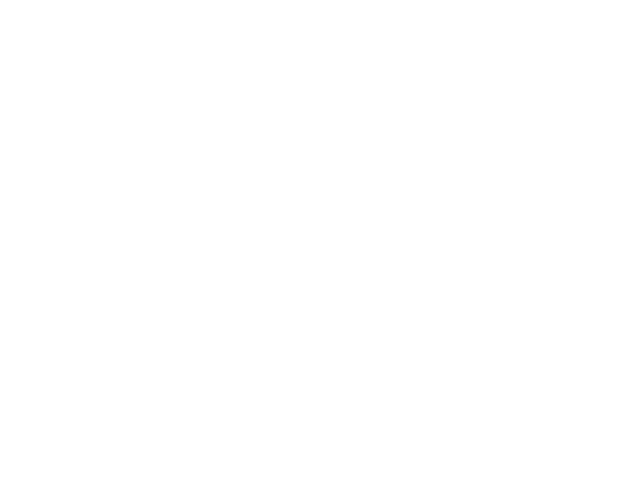

MovieWriter None unavailable; using Pillow instead.


In [31]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib notebook 

ellipses=ellipses[:10]+ellipses[10::5]
print(len(ellipses))

fig, ax = plt.subplots()
ax.imshow(np.log10(y),extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')

def AnimationFunction(frame):
    ax.imshow(np.log10(y),extent=[x1_min,x1_max,x2_min,x2_max], cmap=cm.jet, origin='lower')
    ax.add_patch(ellipses[frame])
    if frame > 0:
        ellipses[frame-1].remove()

anim_created = FuncAnimation(fig, AnimationFunction, frames=len(ellipses), interval=1)

anim_created.save("/mnt/c/Users/7G5381848/Documents/movie.gif",
          writer = 'None', fps = 1)

plt.close()

In [17]:
np.arctan(180)

1.565240828394204